# Описание задания

# Лабораторная работа №2

**Цель:** изучение библиотек обработки данных Pandas и PandaSQL.

Задание:

* Выполнить первое демонстрационное задание "demo assignment" под названием "Exploratory data analysis with Pandas" со страницы курса https://mlcourse.ai/assignments

* Выполнить с использованием двух различных библиотек - Pandas и PandaSQL один произвольный запрос на соединение двух наборов данных и один произвольный запрос на группировку набора данных с использованием функций агрегирования

* Сравнить время выполнения каждого запроса в Pandas и PandaSQL.

# Ход выполнения лабораторной работы

## Часть 1

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 20.8MB/s 


In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

In [0]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "title='adult.data.csv'"}).GetList()

In [0]:
for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: adult.data.csv, id: 1vXyexGiSLo9hKDmbmm4tsUvIioKeuW-M
downloading to /root/data/adult.data.csv


In [0]:
!pip install -U pandasql

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv(fname, sep=",")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


* Сколько мужчин и женщин представлено в этом наборе данных?

In [0]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

* Каков средний возраст женщины?

In [0]:
mean_age = data.loc[data['sex'] == 'Female', 'age'].mean()
print("Average age of women: {0}".format(round(mean_age, 2)))

Average age of women: 36.86


* Какой процент граждан из Германии?

In [0]:
data.loc[data['native-country'] == 'Germany'].shape[0] / data.shape[0]

0.004207487485028101

* Каково среднее и стандартное отклонение возраста для тех, кто зарабатывает более 50 тысяч в год и тех, кто зарабатывает менее 50 тысяч в год?

In [0]:
more_than_fifty = data.loc[data['salary'] == '>50K', 'age']
less_than_fifty = data.loc[data['salary'] == '<=50K', 'age']

print("Average age of >50K: {0} +- {1}".format(round(more_than_fifty.mean()),
                                               round(more_than_fifty.std(), 2)))
print("Average age of >50K: {0} +- {1}".format(round(less_than_fifty.mean()),
                                               round(less_than_fifty.std(), 2)))

Average age of >50K: 44 +- 10.52
Average age of >50K: 37 +- 14.02


* Правда ли, что люди, которые зарабатывают более 50 тысяч, имеют хотя бы среднее образование?

In [0]:
data.loc[data['salary'] == '>50K', 'education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

Следовательно, это утверждение неверно

* Отображение статистики по возрасту для каждой расы и каждого пола. Используйте groupby() и describe(). Найти максимальный возраст мужчин американо-индийско-эскимосской расы.

In [0]:
for (race, sex), sub_data in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_data['age'].describe())
    print()

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64

Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64

Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64

Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64

Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.00

In [0]:
grouped_data = data.groupby(['race', 'sex'])
print("Максимальный возраст мужчин расы Amer-Indian-Eskimo: {0}"
      .format(grouped_data.get_group(('Amer-Indian-Eskimo','Male'))['age'].max(0)))

Максимальный возраст мужчин расы Amer-Indian-Eskimo: 82


* Среди кого больше доля тех, кто много зарабатывает (> 50 тыс.): замужние или одинокие мужчины? Считается, что в браке находятся те, кто имеет семейное положение Married-civ-spouse, Married-spouse-absent или Married-AF-spouse, остальные считаются холостяками.

In [0]:
married_salary_stat = data.loc[(data['sex'] == 'Male') & 
         (data['marital-status'].str.startswith('Married'))]
male_married = married_salary_stat.shape[0]
rich_married = married_salary_stat.loc[married_salary_stat['salary'] == '>50K'].shape[0]

bachelors_salary_stat = data.loc[(data['sex'] == 'Male') & 
         ~(data['marital-status'].str.startswith('Married'))]
male_bachelors = bachelors_salary_stat.shape[0]
rich_bachelors = bachelors_salary_stat.loc[bachelors_salary_stat['salary'] == '>50K']
                                      .shape[0]

print("Доля женатых мужчин с заработком >50К: {0}%"
      .format(round(rich_married / male_married * 100, 2)))
print("Доля холостяков с заработком >50К: {0}%"
      .format(round(rich_bachelors / male_bachelors * 100, 2)))

Доля женатых мужчин с заработком >50К: 44.05%
Доля холостяков с заработком >50К: 8.45%


* Какое максимальное количество часов работает человек в неделю? Сколько человек работает такое количество часов, и каков процент тех, кто зарабатывает много (> 50 тыс.) среди них?

In [0]:
max_load = data['hours-per-week'].max()
num_people_max_load = data[data['hours-per-week'] == max_load].shape[0]
proportion = data.loc[(data['hours-per-week'] == max_load)
                 & (data['salary'] == '>50K')].shape[0] / num_people_max_load * 100

print("Максимальное количество рабочих часов в неделю: {0}".format(max_load))
print("Количество людей, работающих {0} часов в неделю: {1}"
      .format(max_load, num_people_max_load))
print("Доля людей с большим заработком среди тех, кто работает {0} часов в неделю: {1}%"
     .format(max_load, round(proportion, 2)))

Максимальное количество рабочих часов в неделю: 99
Количество людей, работающих 99 часов в неделю: 85
Доля людей с большим заработком среди тех, кто работает 99 часов в неделю: 29.41%


In [0]:
pd.crosstab(data['native-country'], data['salary'], 
           values=data['hours-per-week'], aggfunc=np.mean).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


## Часть 2

In [0]:
# After first 3 cells in part 1
file_list = drive.ListFile(
    {'q': "title contains 'lab2_mlm_'"}
).GetList()

In [0]:
fnames = []
for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fnames.append(os.path.join(local_download_path, f['title']))
  print('downloading to {0}[{1}]'.format("fnames", len(fnames) - 1))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fnames[len(fnames) - 1])

title: lab2_mlm_android_devices.csv, id: 1bI3VlDPG2dcEKvgjbkvEKtk1ARk2o-lT
downloading to fnames[0]
title: lab2_mlm_user_usage.csv, id: 15nU307WimMU2i-rLDCHr7Ui3Kpcexrq0
downloading to fnames[1]
title: lab2_mlm_user_device.csv, id: 1lKGI6cKiSrsO7p1isuVoQWpWRhjwhwVF
downloading to fnames[2]


In [0]:
android_devices = pd.read_csv(fnames[0], sep=",")
android_devices.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [0]:
user_usage = pd.read_csv(fnames[1], sep=",")
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [0]:
user_device = pd.read_csv(fnames[2], sep=",")
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


### Произвольный запрос на соединение двух наборов данных

* Pandas

In [0]:
def join_pandas(user_usage, user_device):
  joined = pd.merge(user_usage,
                    user_device[['use_id', 'platform', 'device']],
                    on='use_id')
  return joined

In [0]:
result = join_pandas(user_usage, user_device)
print("{0} записей".format(result.shape[0]))
result.head()

159 записей


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


* PandaSQL

In [0]:
# PandaSQL can't find datasets without arguments
def join_pandasql(user_usage, user_device):  
  query = """SELECT
          use.*, dev.platform, dev.device
       FROM
          user_usage use
       JOIN
          user_device dev
             ON use.use_id = dev.use_id;"""

  return ps.sqldf(query, locals())

In [0]:
result = join_pandasql(user_usage, user_device)
print("{0} записей".format(result.shape[0]))
result.head()

159 записей


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [0]:
import time

def count_mean_time(func, params, N = 5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

* Оценка времени выполнения

In [0]:
all_use_id = user_usage.use_id.unique().tolist()
len(all_use_id)

240

In [0]:
join_times = []
for use_id_count in range(5, 250, 5):
    use_ids = all_use_id[:use_id_count]
    user_usage_sample = user_usage[user_usage.use_id.isin(use_ids)]
    user_device_sample = user_device[user_device.use_id.isin(use_ids)]
    count = user_usage_sample.shape[0]
    pandasql_time = count_mean_time(join_pandasql,
                                    [user_usage_sample, user_device_sample])
    pandas_time = count_mean_time(join_pandas,
                                  [user_usage_sample, user_device_sample])
    join_times.append({'count': count, 
                       'pandasql_time': pandasql_time, 
                       'pandas_time': pandas_time})

In [0]:
join_times_df = pd.DataFrame(join_times).set_index('count')

Text(0, 0.5, 'time, seconds')

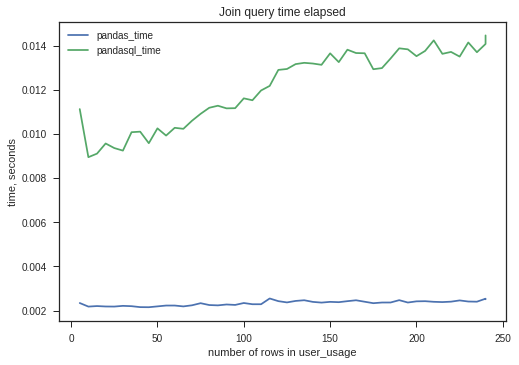

In [0]:
ax = join_times_df.plot(title = 'Join query time elapsed')
ax.set_xlabel('number of rows in user_usage')
ax.set_ylabel('time, seconds')

### Произвольный запрос на группировку набора данных с использованием функций агрегирования

* Pandas

In [0]:
def aggregation_pandas(result):
  return result.groupby('platform', as_index=False)
                        .agg({"outgoing_sms_per_month": "mean"})

In [0]:
agg_result = aggregation_pandas(result)
agg_result

,platform,outgoing_sms_per_month
0,android,85.354586
1,ios,293.975000


* PandaSQL

In [0]:
def aggregation_pandasql(result):
  query = """SELECT
            platform, 
            AVG(outgoing_sms_per_month) AS outgoing_sms_per_month
         FROM
            result
         GROUP BY platform;
         """

  return ps.sqldf(query, locals())

In [0]:
agg_result = aggregation_pandasql(result)
agg_result

,platform,outgoing_sms_per_month
0,android,85.354586
1,ios,293.975000


In [0]:
aggregation_times = []
for count in range(2, 160, 2):
    pandasql_time = count_mean_time(aggregation_pandasql, [result[:count]])
    pandas_time = count_mean_time(aggregation_pandas, [result[:count]])
    aggregation_times.append({'count': count,
                              'pandasql_time': pandasql_time,
                              'pandas_time': pandas_time})

In [0]:
aggregation_times_df = pd.DataFrame(aggregation_times)
aggregation_times_df.columns = ['number of rows in result', 
                                'pandas time', 
                                'pandasql time']
aggregation_times_df = aggregation_times_df.set_index('number of rows in result')

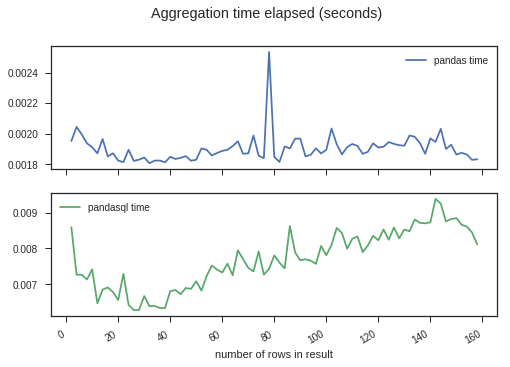

In [0]:
ax = aggregation_times_df.plot(title = 'Aggregation time elapsed (seconds)', subplots = True)